This Jupyter notebook serves as a practical complement to our paper, "Statistical Insights into Spatial Patterns: A Panorama About Lacunarity."

We also provide an R code implementation at:
https://github.com/erveton/Lacunarity_different_sizes_of_boxes

#Clique here to start

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import time

# Main code

In [2]:
def calculate_lacunarity(matrix, box_size):
    """Calculate lacunarity for a given box size"""
    counts = []
    for i in range(matrix.shape[0] - box_size + 1):
        for j in range(matrix.shape[1] - box_size + 1):
            window = matrix[i:i+box_size, j:j+box_size]
            zero_count = np.sum(window == 0)
            counts.append(zero_count)

    counts = np.array(counts)
    if len(counts) == 0:
        return np.nan

    M1 = np.mean(counts)
    M2 = np.mean(counts**2)

    if M1 == 0:
        return np.inf  # Handle division by zero for p=0 case

    return M2 / (M1**2)

In [3]:
def generate_image_pattern(size_multiplier=12):
    padraoMatrix = np.asarray(
        [[1,1,0,1,1,1,0,1,0,1,1,0],
         [0,0,0,0,0,1,0,0,0,1,1,1],
         [0,1,0,1,1,1,1,1,0,1,1,0],
         [1,0,1,1,1,0,0,0,0,0,0,0],
         [1,1,0,1,0,1,0,0,1,1,0,0],
         [0,1,0,1,1,0,0,1,0,0,1,0],
         [0,0,0,0,0,1,1,1,1,1,1,1],
         [0,1,1,0,0,0,1,1,1,1,0,0],
         [0,1,1,1,0,1,1,0,1,0,0,1],
         [0,1,0,0,0,0,0,0,0,1,1,1],
         [0,1,0,1,1,1,0,1,1,0,1,0],
         [0,1,0,0,0,1,0,1,1,1,0,1]])

    surf = np.zeros((12 * size_multiplier, 12 * size_multiplier), dtype=int)

    for y in range(padraoMatrix.shape[0]):
        for x in range(padraoMatrix.shape[1]):
            if padraoMatrix[y,x] == 1:
                surf[size_multiplier*y:size_multiplier*(y+1), size_multiplier*x:size_multiplier*(x+1)] = 1
    return surf

# Generate the surface image
# For 144x144 image, size_multiplier = 12
surf = generate_image_pattern(size_multiplier=12)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate the surface image (144x144)
surf = generate_image_pattern(size_multiplier=12)

# Define box sizes to test
box_sizes_to_test = [1, 2, 4, 8, 16, 32, 64, 128]

# Analyze lacunarity
results = {'box_size': [], 'lacunarity': []}

start_time = time.time()

for box_size in box_sizes_to_test:
    if box_size > min(surf.shape):
        continue  # Skip box sizes larger than the matrix

    lacunarity = calculate_lacunarity(surf, box_size)

    if not np.isnan(lacunarity):
        results['box_size'].append(box_size)
        results['lacunarity'].append(lacunarity)

end_time = time.time()
print(f"Analysis took: {end_time - start_time:.4f} seconds")

# Convert to log scale for plotting
log_box_sizes = np.log(results['box_size'])
log_lacunarity = np.log(results['lacunarity'])


Analysis took: 1.0218 seconds


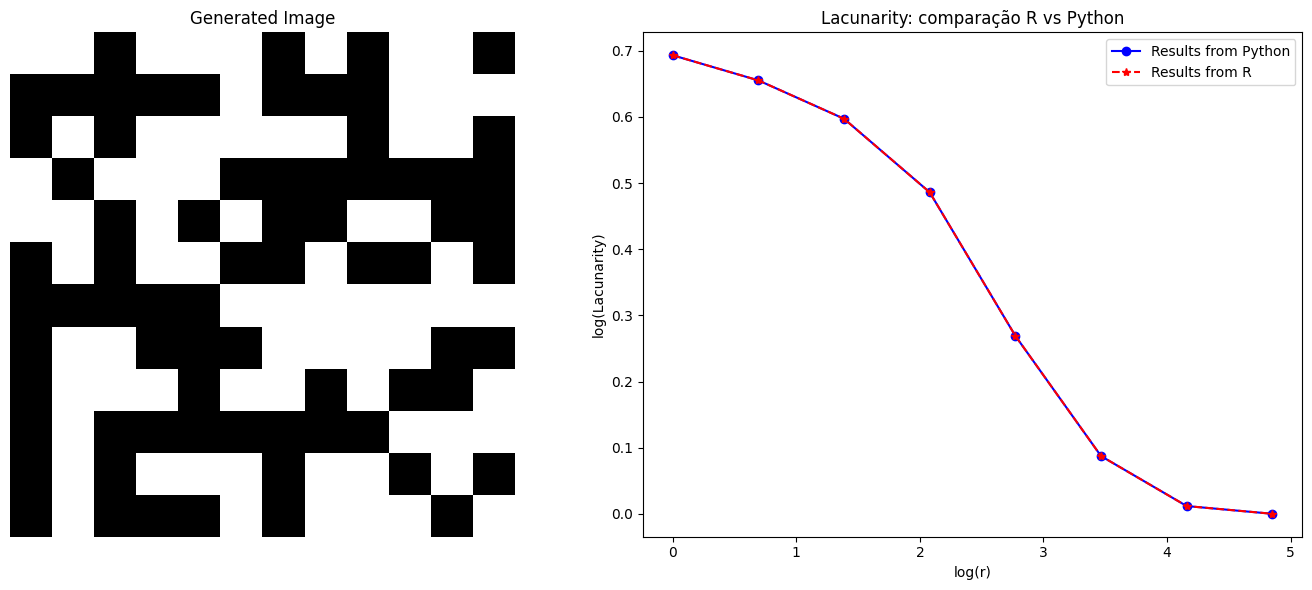

In [5]:
# --- Resultados do R - Pinheiro ---
arr_N = np.array( [1,2,4,8,16,32,64,128] )
arr_lac = np.array( [2,1.92549118981736,1.81702012511167,1.62590490074514,1.30880314406664,1.09138264611069,1.01201196357609,1.0002523927586] )

# Calculate log values for Pinheiro results
log_arr_N = np.log(arr_N)
log_arr_lac = np.log(arr_lac)

# --- Plotting ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the generated image
axs[0].imshow(surf, interpolation="none", cmap="gray")
axs[0].set_title("Generated Image")
axs[0].axis('off')




# Plot results
axs[1].plot(log_box_sizes, log_lacunarity, 'bo-', label='Results from Python')
axs[1].plot(log_arr_N, log_arr_lac, 'r*--', label='Results from R')

axs[1].set_title("Lacunarity: comparação R vs Python")
axs[1].set_xlabel('log(r)')
axs[1].set_ylabel('log(Lacunarity)')


axs[1].legend()
plt.tight_layout()



#Minimal Example

--- Case 1: v=1 (Chessboard pattern) ---
--- Case 2: v=0 (Diagonal pattern) ---

--- Summary ---


,Case,Estimated Lacunarity,Theoretical Lacunarity
0,v=1 (Chessboard),1.00,1.00
1,v=0 (Diagonal),1.04,1.04


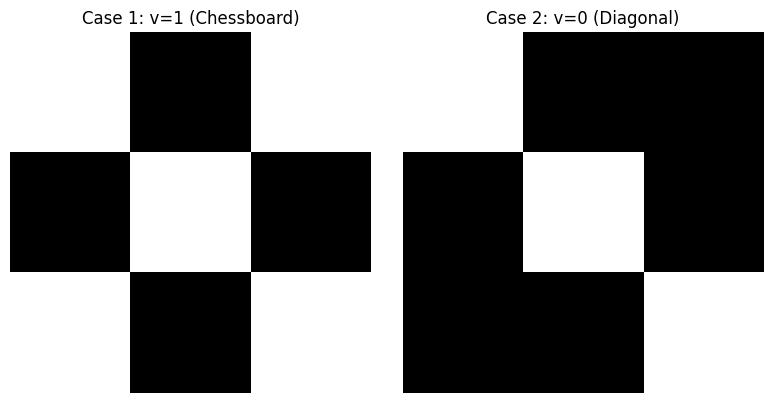

In [6]:

# --- Case 1: v=1 (Chessboard pattern) ---
print("--- Case 1: v=1 (Chessboard pattern) ---")
img_v1 = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
], dtype=int)

# Calculate lacunarity for box size 2
lac_v1 = calculate_lacunarity(img_v1, 2)
theoretical_lac_v1 = 1.0

# --- Case 2: v=0 (Diagonal pattern) ---
print("--- Case 2: v=0 (Diagonal pattern) ---")
img_v0 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
], dtype=int)

# Calculate lacunarity for box size 2
lac_v0 = calculate_lacunarity(img_v0, 2)
theoretical_lac_v0 = 6.5 / (2.5**2)  # = 1.04

# --- Plotting ---
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img_v1, cmap='gray', interpolation='none')
axs[0].set_title('Case 1: v=1 (Chessboard)')
axs[0].axis('off')

axs[1].imshow(img_v0, cmap='gray', interpolation='none')
axs[1].set_title('Case 2: v=0 (Diagonal)')
axs[1].axis('off')
plt.tight_layout()

# --- Results Summary ---
print("\n--- Summary ---")
summary_data = {
    "Case": [" v=1 (Chessboard)", "v=0 (Diagonal) "],
    "Estimated Lacunarity": [lac_v1, lac_v0],
    "Theoretical Lacunarity": [theoretical_lac_v1, theoretical_lac_v0]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df)



#Fig1 of the paper

In [7]:

def sierpinski_matrix(n):
    """
    Cria uma matriz representando o Tapete de Sierpinski de ordem n.

    Args:
        n: A ordem do tapete de Sierpinski (um inteiro não negativo).

    Returns:
        Uma matriz NumPy representando o tapete de Sierpinski.
    """
    if n == 0:
        return np.array([[1]])
    else:
        smaller_sierpinski = sierpinski_matrix(n - 1)

        # Cria uma matriz maior preenchida com zeros
        size = 3**(n)
        matrix = np.zeros((size, size), dtype=int)

        # Preenche a matriz com base na matriz menor
        for i in range(3):
            for j in range(3):
                if i == 1 and j == 1:
                    continue  # Remove o quadrado central
                else:
                    matrix[i*3**(n-1):(i+1)*3**(n-1), j*3**(n-1):(j+1)*3**(n-1)] = smaller_sierpinski
        return matrix

In [8]:
def criar_matriz_alternada(linhas_0, linhas_1, colunas):
    """
    Cria uma matriz com linhas alternadas de 0s e 1s.

    Args:
      linhas_0: Número de linhas com zeros.
      linhas_1: Número de linhas com uns.
      colunas: Número de colunas em cada linha.

    Returns:
      Uma matriz (lista de listas) com os padrões desejados.
    """
    matriz = []
    for i in range(linhas_0):
        matriz.append([0] * colunas)
    for i in range(linhas_1):
        matriz.append([1] * colunas)
    for i in range(linhas_0):
        matriz.append([0] * colunas)
    for i in range(linhas_1):
        matriz.append([1] * colunas)
    for i in range(linhas_0):
        matriz.append([0] * colunas)
    for i in range(linhas_1):
        matriz.append([1] * colunas)
    return matriz

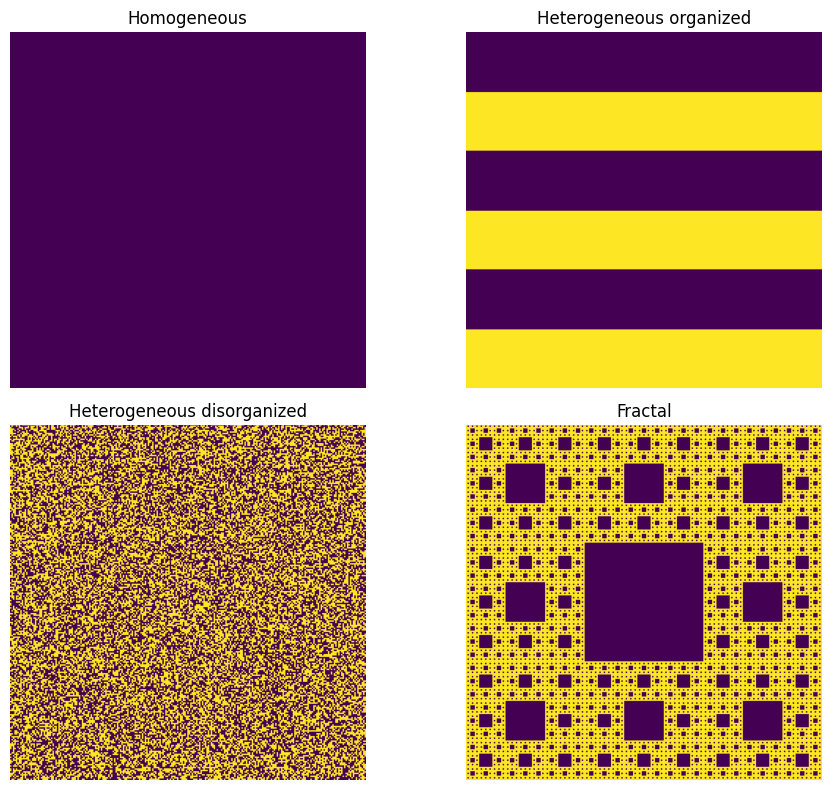

In [9]:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Matriz homogenea
n = m = 243
mat_homogenea = [[1 for _ in range(m)] for _ in range(n)]

# Convert the list of lists to a NumPy array
mat_homogenea = np.array(mat_homogenea)

# Use a valid colormap name like 'viridis'
# The imshow function in the notebook was missing the axis object to plot on.
# It was calling the global plt.imshow instead of axes[0, 0].imshow() or similar.
# Also, ensure the colormap is applied to the correct axis.
axes[0, 0].imshow(mat_homogenea, cmap='viridis')
axes[0, 0].set_title('Homogeneous') # Add a title for clarity
axes[0, 0].axis('off') # Turn off axes for image plot

# matriz heterogenea organizada
# Exemplo de uso
linhas_0 = 41
linhas_1 = 40
colunas = 243
mat_heterogenea_np = np.array(criar_matriz_alternada(linhas_0, linhas_1, colunas))

# Plot the heterogeneous matrix on another subplot axis
axes[0, 1].imshow(mat_heterogenea_np, cmap='viridis') # Using 'gray' colormap for binary data
axes[0, 1].set_title('Heterogeneous organized')
axes[0, 1].axis('off')


# Note: The original R rep call 'z = rep(vec,50,each =2048)' as written
# would not directly produce a 256x256 matrix. The above code
# provides a plausible interpretation for creating a heterogeneous matrix

#gera uma matriz heterogenea desorganizada
# Replace R's runif with numpy.random.uniform
# Replace R's ifelse with numpy.where

# Heterogenea desorganizada

mat_aleatoria = np.random.choice([0, 1], size=(m, n))
axes[1, 0].imshow(mat_aleatoria, cmap='viridis')
axes[1, 0].set_title('Heterogeneous disorganized')
axes[1, 0].axis('off')

# Fractal

sierpinski = sierpinski_matrix(5)
axes[1, 1].imshow(sierpinski, cmap='viridis')
axes[1, 1].set_title('Fractal')
axes[1, 1].axis('off')

plt.tight_layout() # Adjust layout to prevent overlap



In [10]:
print(sierpinski.shape)
print(mat_homogenea.shape)
print(mat_heterogenea_np.shape)
print(mat_aleatoria.shape)

(243, 243)
(243, 243)
(243, 243)
(243, 243)


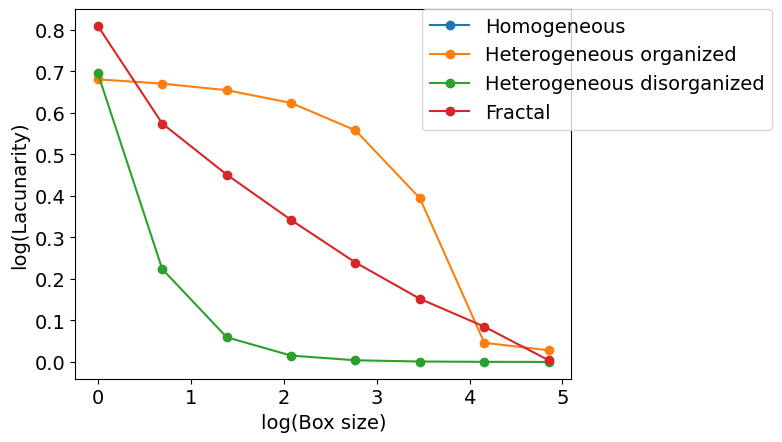

In [11]:
# Define the box sizes for analysis
box_sizes_to_test = [1, 2, 4, 8, 16, 32, 64, 128]

# Calculando as curvas de lacunaridade
lo_v3_homo, la_v3_homo = [], []
lo_v3_het, la_v3_het = [], []
lo_v3_aleat, la_v3_aleat = [], []
lo_v3_fractal, la_v3_fractal = [], []

for box_size in box_sizes_to_test:
    if box_size > min(mat_homogenea.shape):
        continue # Skip box sizes larger than the matrix

    # Calculate lacunarity for each matrix and box size
    lac_homo = calculate_lacunarity(mat_homogenea, box_size)
    lac_het = calculate_lacunarity(mat_heterogenea_np, box_size)
    lac_aleat = calculate_lacunarity(mat_aleatoria, box_size)
    lac_fractal = calculate_lacunarity(sierpinski, box_size)

    # Append results if not NaN
    if not np.isnan(lac_homo):
        lo_v3_homo.append(np.log(box_size))
        la_v3_homo.append(np.log(lac_homo))

    if not np.isnan(lac_het):
        lo_v3_het.append(np.log(box_size))
        la_v3_het.append(np.log(lac_het))

    if not np.isnan(lac_aleat):
        lo_v3_aleat.append(np.log(box_size))
        la_v3_aleat.append(np.log(lac_aleat))

    if not np.isnan(lac_fractal):
        lo_v3_fractal.append(np.log(box_size))
        la_v3_fractal.append(np.log(lac_fractal))


# Plotar resultados
plt.plot(lo_v3_homo, la_v3_homo, 'o-', label='Homogeneous')
plt.plot(lo_v3_het, la_v3_het, 'o-', label='Heterogeneous organized')
plt.plot(lo_v3_aleat, la_v3_aleat, 'o-', label='Heterogeneous disorganized')
plt.plot(lo_v3_fractal, la_v3_fractal, 'o-', label='Fractal')
plt.xlabel('log(Box size)', fontsize=14)
plt.ylabel('log(Lacunarity)',fontsize=14)
plt.legend(fontsize=14, bbox_to_anchor=(0.7, 1), loc='upper left', borderaxespad=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
